In [0]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# EXAMPLE FROM THE DOCUMENTATION: https://www.cvxpy.org/

# Problem data.
m = 30
n = 20
np.random.seed(7)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
print('The optimal objective value:\n', result)

# The optimal value for x is stored in `x.value`.
print('\nThe optimal value for vector x:\n', x.value)

# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print('\nThe optimal Lagrange multiplier for a constraint:\n',
      constraints[0].dual_value)

The optimal objective value:
 21.124477018599777

The optimal value for vector x:
 [ 4.94547326e-02  2.18154562e-01  1.42566918e-01  3.24584977e-01
 -1.26647589e-19  2.45711423e-01 -2.13093730e-19  2.49727652e-01
  1.14842503e-01 -3.43905877e-20 -7.51586723e-20 -2.61331997e-19
  9.39754650e-02 -1.68423363e-19  9.12007381e-02  3.06656618e-01
  4.22254974e-20 -1.43687361e-19  2.66473584e-02  1.14983974e-01]

The optimal Lagrange multiplier for a constraint:
 [ 0.          0.          0.          0.         13.31570682  0.
 11.4333242   0.          0.          1.87630193 14.11584025 11.33371625
  0.          9.39104669  0.          0.          1.06999129  9.03506022
  0.          0.        ]


In [4]:
# EXAMPLE FROM Thomas, R. (2012, October 14). Linear Programming Tutorial [video file]

x, y = cp.Variable(2)
objective = cp.Maximize(40*x + 30*y)
constraints = [0 <= x, 0 <= y, x + y <= 240, 2*x + y <= 320]
prob = cp.Problem(objective, constraints)

result = prob.solve()

print('Acres of corn: ', x.value, 
      '\nAcres of oats: ', y.value, 
      '\nTotal maximum profit: ', result)

Acres of corn:  79.99999999999997 
Acres of oats:  160.00000000000003 
Total maximum profit:  7999.999999999999


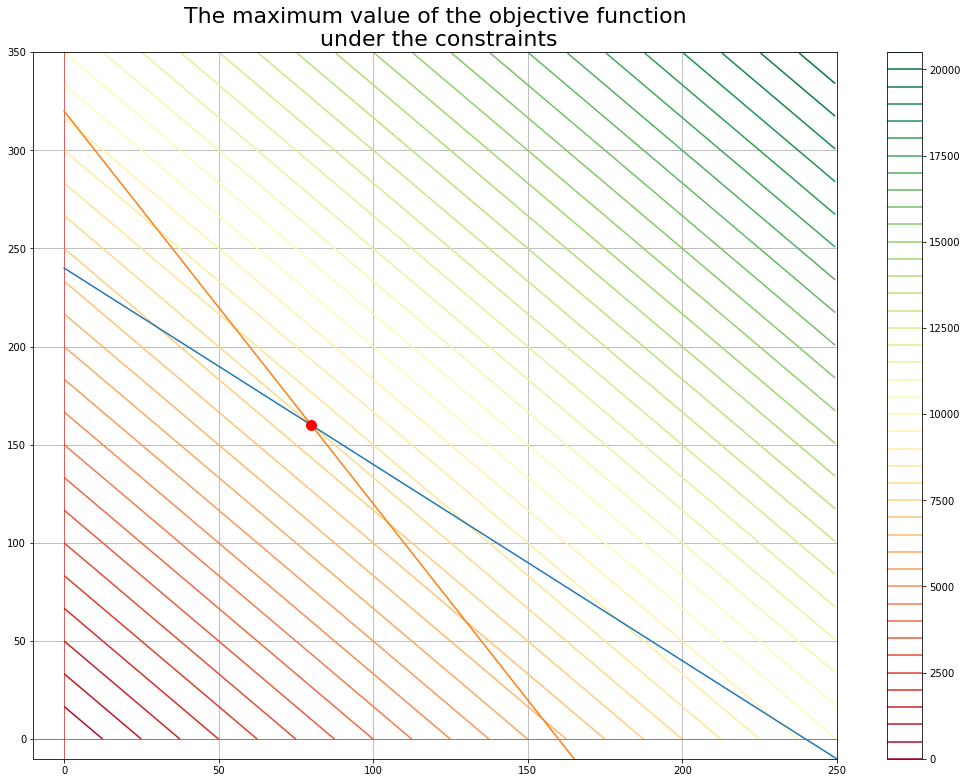

In [8]:
c1 = lambda x, y: 240 - (x + y)
c2 = lambda x, y: 320 - (2*x + y)

x, y = np.linspace(0, 250), np.linspace(0, 250)
X, Y = np.meshgrid(np.arange(0, 250, .5), np.arange(0, 350, .5))
Z = 40*X + 30*Y

plt.figure(figsize=(18, 13))
plt.contour(X, Y, Z, 50,cmap='RdYlGn')
plt.axhline(0, color='red', linewidth=.5)
plt.axvline(0, color='red', linewidth=.5)
plt.plot(x+y, c1(x, y))
plt.plot(x/2+y, c2(x, y))
plt.plot([80], [160], marker='o', markersize=10, color="red")
plt.colorbar()
plt.xlim(-10, 250)
plt.ylim(-10, 350)
plt.grid(True)
plt.title('The maximum value of the objective function\n under the constraints',
          fontsize=22)
plt.show()